In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json 

sns.set()
sheetADf = pd.read_csv('/content/drive/MyDrive/SheetA.csv')
sheetBDf = pd.read_csv('/content/drive/MyDrive/SheetB.csv')
sheetCDf = pd.read_csv('/content/drive/MyDrive/SheetC.csv')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Question 1: Name each sheet/table so they are meaningful standalone

1. SheetA: Grill_General_Comparison 
2. SheetB: Cooking_Quality
3. SheetC: Test_result

Question 2:
Which grill type is more fuel efficent based on sheet A

<Figure size 360x360 with 0 Axes>

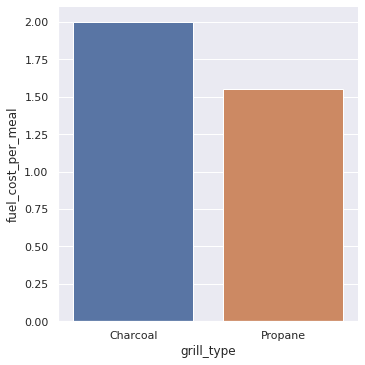

In [13]:
plt.figure(figsize=(5, 5))
sns.catplot(x="grill_type", y="fuel_cost_per_meal", kind="bar", data=sheetADf)


In [ ]:
plt.savefig(u'answer2.png')
plt.close()

Question 3: Which grill type has more market share

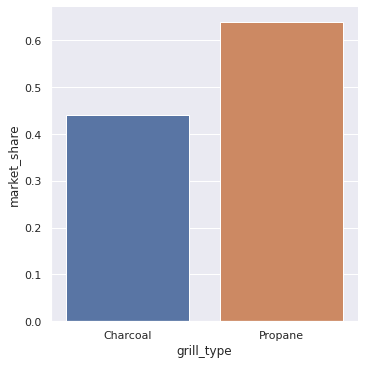

In [14]:
sns.catplot(x="grill_type", y="market_share", kind="bar", data=sheetADf)


In [ ]:
plt.savefig(u'answer3.png')
plt.close()

Question 4: Base on cookoff data which grill type cost more fuel on a long run

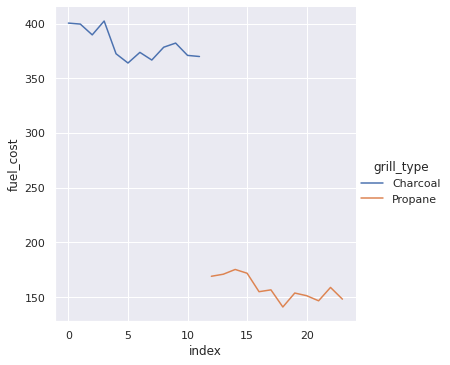

In [15]:
sheetBDf2  = sheetBDf.copy()
sheetBDf2.sort_values(by=['grill_type','fuel_cost'],inplace=True)
sheetBDf2.reset_index(inplace=True)
sns.relplot(x='index',y="fuel_cost", hue="grill_type", kind="line", data=sheetBDf2)


In [ ]:
plt.savefig(u'answer4_1.png')
plt.close()

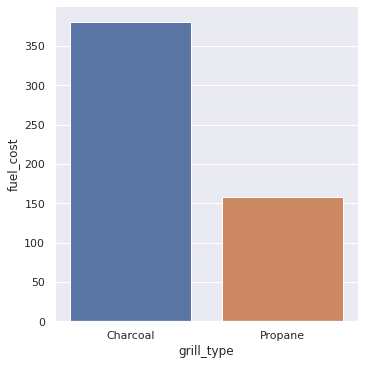

In [16]:
sheetBDf2 = sheetBDf2.groupby('grill_type',as_index=False).mean()
sns.catplot(x='grill_type',y="fuel_cost",kind="bar", data=sheetBDf2)


In [ ]:
plt.savefig(u'answer4_2.png')
plt.close()

Question 5: considering that the average American grill owner buys a new grill every three years. Which grill type would cost more based on the fuel cost and initial investment

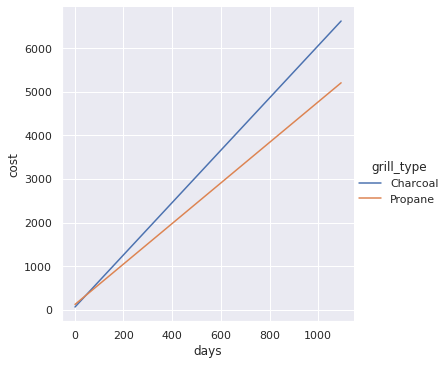

In [21]:
meals_per_day = 3
newDf = {}
newDf['days'] = list(range(1,365*3,1))
newDf['cost'] = [59+x*2*meals_per_day for x in newDf['days']]
df1 = pd.DataFrame(newDf)
df1['grill_type'] = 'Charcoal'
newDf['days'] = list(range(1,365*3,1))
newDf['cost'] = [119+x*1.55*meals_per_day for x in newDf['days']]
#Here I made change to original data, which decrease the initial price down by 20
df2 = pd.DataFrame(newDf)
df2['grill_type'] = 'Propane'
df = df1.append(df2)

sns.relplot(x='days',y="cost", hue="grill_type", kind="line", data=df)



In [ ]:
plt.savefig(u'answer5.png')
plt.close()

Question 6:Which grill type is easier to use baed on the user satisfaction score? Based on data, which grill is preferred? What factors might play a role?

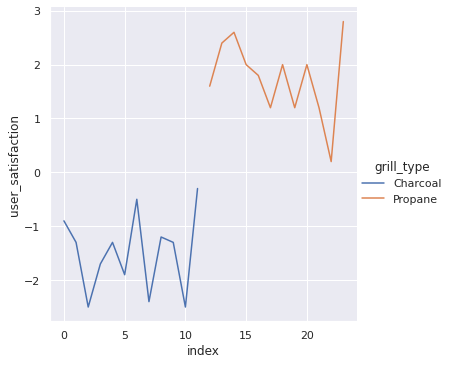

In [18]:
sheetBDf2  = sheetBDf.copy()
sheetBDf2.sort_values(by=['grill_type','user_satisfaction'],inplace=True)
sheetBDf2.reset_index(inplace=True)
sns.relplot(x='index',y="user_satisfaction", hue="grill_type", kind="line", data=sheetBDf2)

In [ ]:
plt.savefig(u'answer6_1.png')
plt.close()

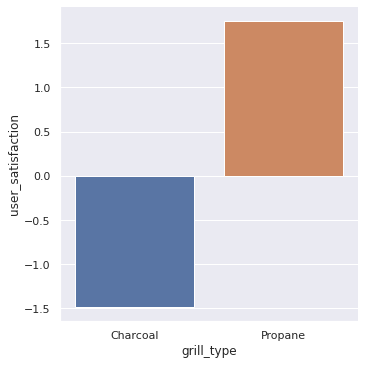

In [19]:
sheetBDf2 = sheetBDf2.groupby('grill_type',as_index=False).mean()
sheetBDf2 = sheetBDf2.groupby('grill_type',as_index=False).mean()
sns.catplot(x='grill_type',y="user_satisfaction",kind="bar", data=sheetBDf2)

In [ ]:
plt.savefig(u'answer6_2.png')
plt.close()

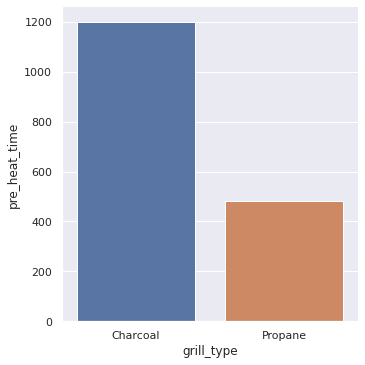

In [20]:
sns.catplot(x='grill_type',y="pre_heat_time",kind="bar", data=sheetADf)

In [ ]:
plt.savefig(u'answer6_3.png')
plt.close()

Question 7: Please generate an aggregated dataset to present your conclusions.

In [ ]:
conclusions = {}
conclusions['grill_type'] = ['Charcoal','Propane']
conclusions['more_efficent'] = ['no','yes']
conclusions['more_fuel_long_run'] = ['yes','no']
conclusions['more_cost'] = ['yes','no']
conclusions['more_easier'] = ['no','yes']
conclusions['more_preferred'] = ['no','yes']
conclusions['key_role'] = ['pre heat time','pre heat time']
conclusions = pd.DataFrame(conclusions)
conclusions.to_excel('conclusions.xls')



Question 8: Are your recommendations to the manufacturer different to recommendations you'd make to user?

Yes the recommendations would be different.
1. To manufacturer: If the user wants to even the cost for propane grill, he or she has to grill at least 134 times a year, which is highly unlikely. Hence the manufacturer could raise the price for charchol grill or lower the price for propane grill and the user would still pay for it.

2. To user: Depends on the need of grill per year, he or she should be making decisions by considering the price difference.

Bonus: Transform SheetC.json to SheetC.csv

In [7]:

import pandas as pd
import copy
# import xls_write
import xlwt
import json

def json2xls(josnData,xlsRoute):

    josnDict =dict(josnData)
    resultList = dictRecursionParse(josnDict)

    excel_wt = xlwt.Workbook()
    a=xls_write.sheet_WC(excel_wt,'aa')
    a.write_rows(list2plan(resultList))

    excel_wt.save(xlsRoute)

def dictRecursionParse(dictData,keyGradesList=[]):

    resultList = []
    if not isinstance(dictData,dict):
        
        raise NameError('NotDict',dictData)
    for key,value in dictData.items():
        currentKeyGradesList = copy.copy(keyGradesList)
        currentKeyGradesList.append(key)
        if  isinstance(value,dict):
            
            sonResultList = dictRecursionParse(value,currentKeyGradesList)
            resultList.extend(sonResultList)
        elif isinstance(value,list):
            
            
            for i in range(len(value)):
                currentKeyGradesList2 = copy.copy(currentKeyGradesList)
                currentKeyGradesList2.append(str(i))
                if isinstance(value[i],dict):
                    
                    sonResultList = dictRecursionParse(value[i],currentKeyGradesList2)
                    resultList.extend(sonResultList)  
                else:
                    
                    resultList.append([currentKeyGradesList2,value[i]])                    
        else:
            
            resultList.append([currentKeyGradesList,value])
    return resultList


def list2plan(dataList):

    resultList = []
    maxLen = 0
    for alist in dataList:
       
        if isinstance(alist[1],str) and len(alist[1])>200:
            value = alist[1][:200]
        else:
            value = alist[1]
        alist[0].append(value)
        if maxLen<len(alist[0]):
            maxLen = len(alist[0])
        resultList.append(alist[0])
    resultList2 = []
    for alist in resultList:
        for i in range(maxLen-len(alist)):
            alist.insert(-1,'')
        resultList2.append(alist)
    return resultList2


In [10]:
#bonus:


with open('SheetC.json','r',encoding='utf8')as fp:
    json_data = json.load(fp)


result_dict = {
    'index':[],
    'grill_type':[],
    'is_frozen':[],
    'item_material':[],
    'sample_item_index':[],
    'guess_grill_correct':[],
    'thumbs_up_score':[]
}
json_data2 = json.loads(json_data[0]['test_result'])

for key,value in json_data2.items():
    result_dict['index'].append(key)
    result_dict['grill_type'].append(value['meta_data']['grill_type'])
    result_dict['is_frozen'].append(value['meta_data']['is_frozen'])
    result_dict['item_material'].append(value['meta_data']['item_material'])
    result_dict['sample_item_index'].append(value['sample_item_index'])
    result_dict['guess_grill_correct'].append(value['survey_result']['guess_grill_correct'])
    result_dict['thumbs_up_score'].append(value['survey_result']['thumbs_up_score'])

df = pd.DataFrame(result_dict)
df.to_csv('bonus.csv')

